coeffs 4to grado = [ 8.86553287e+09 -3.29706484e+07  4.54109359e+04 -2.67413558e+01
  5.74593872e-03]


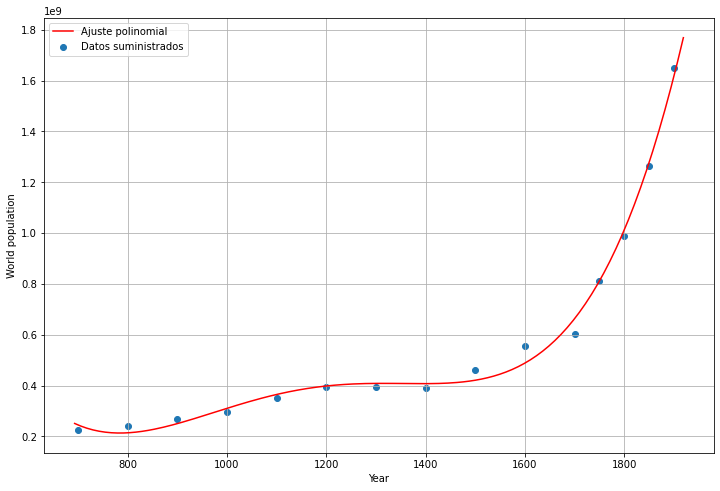

In [7]:
#Laboratorio de métodos computacionales: Ejercicio 7
#Francisco Javier Díaz Perdomo

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/diegour1/LabMetodosComputacionales/main/DataFiles/world_pop.csv")
Data = df[(df["Entity"] == 'Our World In Data') & (df["Year"] >= 700) & (df["Year"] <= 1900)]
Years = Data['Year'].to_list()
Pob = Data['World Population'].to_list()

NPoints = len(Years)
   
x = np.ones(NPoints)
y = np.ones(NPoints)

for i in range(NPoints):
    x[i] = float(Years[i])
    y[i] = float(Pob[i])
    
x = x.reshape(-1,1)

P = np.array([np.ones([NPoints, 1]), x, x**2, x**3, x**4]).reshape(5, NPoints).T

coeff = (np.linalg.inv(P.T @ P)) @ P.T @ y
print(f"coeffs 4to grado = {coeff}")

Xtest = np.linspace(min(x)*0.99, max(x)*1.01, 200)
Ajuste = (coeff[0])+(coeff[1]*(Xtest))+(coeff[2]*(Xtest**2))+(coeff[3]*(Xtest**3))+(coeff[4]*(Xtest**4))

f=plt.figure(figsize=(12,8))
plt.plot(Xtest,Ajuste, label = 'Ajuste polinomial', color = 'r', linewidth=1.5)
plt.scatter(x, y,label = 'Datos suministrados', marker= 'o')
plt.xlabel("Year")
plt.ylabel("World population")
plt.grid()
plt.legend(loc=0)
plt.savefig('DiazFrancisco_grafica.png')